In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load in mym neighborhood data
preincomes = pd.read_csv("Agg_income.csv", sep=",")
preincomes

,Neighborhood,Id,agg_inc,margin_error
0,Allegheny Center,1,39947000.0,6.437773e+06
1,Allegheny West,2,23793300.0,2.202594e+07
2,Allentown,3,38303700.0,7.490207e+06
3,Arlington,4,35349900.0,6.140663e+06
4,Arlington Heights,5,2389600.0,1.162393e+06
...,...,...,...,...
86,Upper Lawrenceville,87,65738500.0,1.600713e+07
87,West End,88,3615800.0,2.204875e+06
88,West Oakland,89,16339500.0,3.412753e+06
89,Westwood,90,91857100.0,1.130450e+07


In [5]:
incomes = preincomes[[ "Neighborhood" , "agg_inc"]]
incomes

,Neighborhood,agg_inc
0,Allegheny Center,39947000.0
1,Allegheny West,23793300.0
2,Allentown,38303700.0
3,Arlington,35349900.0
4,Arlington Heights,2389600.0
...,...,...
86,Upper Lawrenceville,65738500.0
87,West End,3615800.0
88,West Oakland,16339500.0
89,Westwood,91857100.0


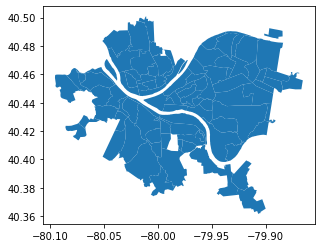

In [6]:
# read in the neighborhoods shape file
hoodmap = geopandas.read_file("hoods.shp")
hoodmap.plot()

In [7]:
# I needed to figure out why my bar plot wasn't working and found out it was because the numbers were reading in as 'String' types
print(incomes.dtypes)

Neighborhood     object
agg_inc         float64
dtype: object


In [8]:
# searched up how to convert Series columns from 'String' to 'Float'
incomes = incomes.astype({'agg_inc':'float'})
print(incomes.dtypes)

Neighborhood     object
agg_inc         float64
dtype: object


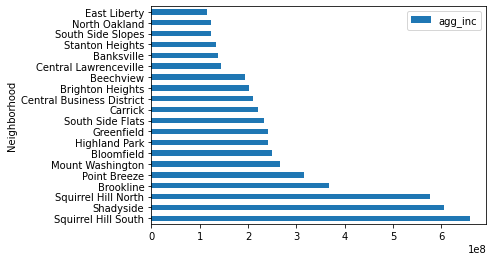

In [9]:
#incomes['agg_inc'] = incomes['agg_inc'].astype(float)
incomes = incomes.sort_values('agg_inc', ascending=False)
#incomes.head()
incomes.head(20).plot.barh(x = 'Neighborhood')
#type(incomes['inc'][0])



#values = []
#nums = []


#for index, row in incomes.iterrows():
#    values.append(incomes['agg_inc'][index])
    
#for num in values:
#    nums.append(float(num))
#    num = float(num)

In [10]:
incMap = hoodmap.merge(incomes, how = 'left', left_on='hood', right_on='Neighborhood')

In [11]:
incMap

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,Shape__Are,Shape__Len,geometry,Neighborhood,agg_inc
0,1293,201,42,003,980600,1,420039806001,Block Group 1,G5030,S,...,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,1.068796e+07,19600.573085,"POLYGON ((-80.02999 40.45909, -80.02989 40.458...",Chateau,NaN
1,1294,10,42,003,261200,1,420032612001,Block Group 1,G5030,S,...,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,1.133208e+07,21174.473326,"POLYGON ((-80.01078 40.49975, -80.01073 40.499...",Summer Hill,40337500.0
2,1295,11,42,003,260900,1,420032609001,Block Group 1,G5030,S,...,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,8.743618e+06,13811.917169,"POLYGON ((-80.00327 40.48271, -80.00325 40.482...",Northview Heights,8755000.0
3,1296,7,42,003,262000,1,420032620001,Block Group 1,G5030,S,...,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,1.754935e+07,18197.745741,"POLYGON ((-79.99761 40.47460, -79.99761 40.474...",Spring Hill-City View,46688500.0
4,1297,8,42,003,261500,1,420032615001,Block Group 1,G5030,S,...,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,2.522420e+07,26390.549314,"POLYGON ((-80.01422 40.47745, -80.01435 40.477...",Perry South,54989600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1378,251,42,003,320400,3,420033204003,Block Group 3,G5030,S,...,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,2.338689e+07,31964.844864,"POLYGON ((-79.99633 40.39458, -79.99630 40.394...",Overbrook,90146300.0
86,1379,265,42,003,563000,4,420035630004,Block Group 4,G5030,S,...,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,3.683820e+06,9978.225999,"POLYGON ((-80.06919 40.46046, -80.06912 40.460...",Chartiers City,13805200.0
87,1380,358,42,003,562500,1,420035625001,Block Group 1,G5030,S,...,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,6.425358e+06,25260.814467,"POLYGON ((-80.05154 40.46364, -80.05140 40.463...",Esplen,5433900.0
88,1381,298,42,003,563100,3,420035631003,Block Group 3,G5030,S,...,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,1.027920e+07,16308.247349,"POLYGON ((-80.03431 40.43366, -80.03424 40.433...",Ridgemont,7893900.0


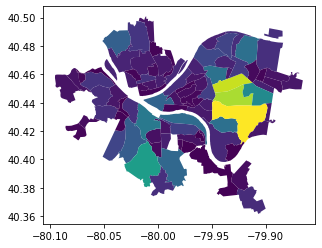

In [12]:
incMap.plot(column = 'agg_inc')

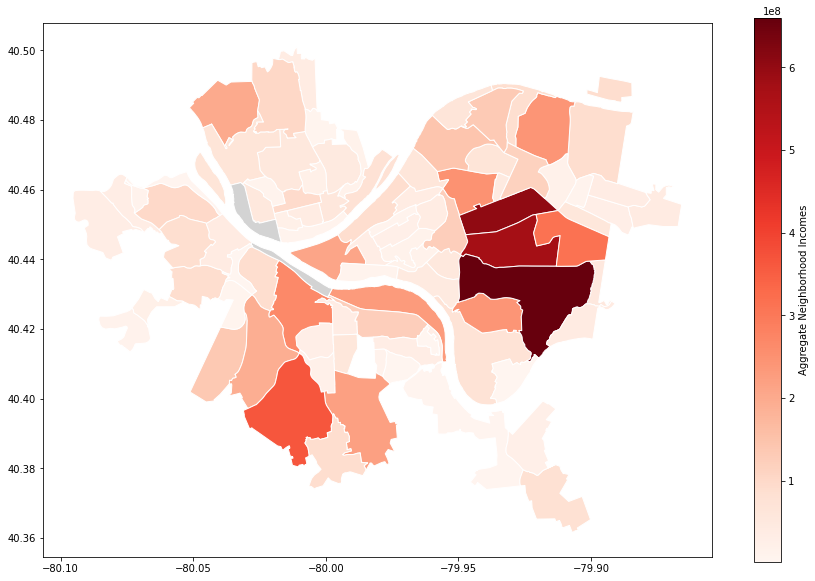

In [13]:
# plt.style.use('seaborn-colorblind')
# plt.title('Center Title')
incMap.plot(column='agg_inc', # set the data to be used for coloring
               cmap='Reds',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Aggregate Neighborhood Incomes"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )